***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv("dados_pnad.csv")

### Visualize o conteúdo do DataFrame

In [3]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
# Salário Mínimo em 2015
salario_minimo = 788.00

# k = 5
intervalos = [
    df['Renda'].min(),
    salario_minimo*2,
    salario_minimo*5,
    salario_minimo*15,
    salario_minimo*25,
    df['Renda'].max()
]

print(intervalos)

[0, 1576.0, 3940.0, 11820.0, 19700.0, 200000]


### 2º Definir os labels das classes

In [5]:
rotulos = ["E", "D", "C", "B", "A"]

print(rotulos)

['E', 'D', 'C', 'B', 'A']


### 3º Construir a coluna de frequências

In [6]:
classes = pd.cut(x=df['Renda'], 
                 bins=intervalos, 
                 labels=rotulos, 
                 include_lowest=True)

# Frequência Absoluta
freq_abs = classes.value_counts()

print(freq_abs)

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64


### 4º Construir a coluna de percentuais

In [7]:
# Frequência Relativa
freq_rel = classes.value_counts(normalize=True) * 100

print(freq_rel)

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
# Criando o DataFrame
df_renda = pd.DataFrame({
    "Frequência": freq_abs,
    "Porcentagem (%)": freq_rel
})

# Renomeando a coluna index
df_renda.rename_axis("Classes Sociais", axis="columns", inplace=True)

# Ordenando o DataFrame
df_renda.sort_index(ascending=False, inplace=True)
df_renda.head()

Classes Sociais,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

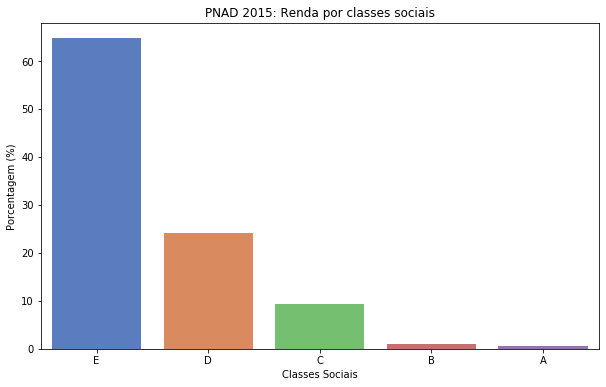

In [9]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df_renda.index, 
                 y="Porcentagem (%)", 
                 data=df_renda, 
                 palette="muted")

ax.set(xlabel="Classes Sociais", 
       title="PNAD 2015: Renda por classes sociais");

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

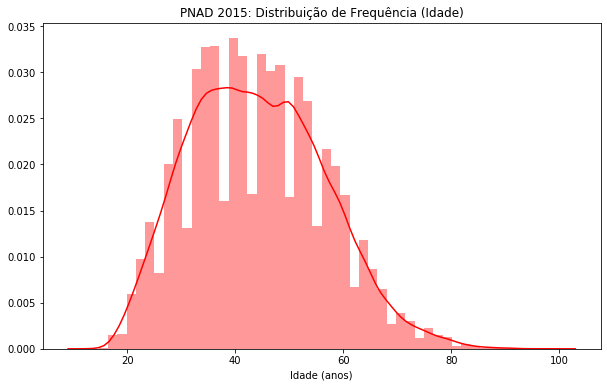

In [10]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df['Idade'], color="red")
ax.set(xlabel="Idade (anos)",
       title="PNAD 2015: Distribuição de Frequência (Idade)");

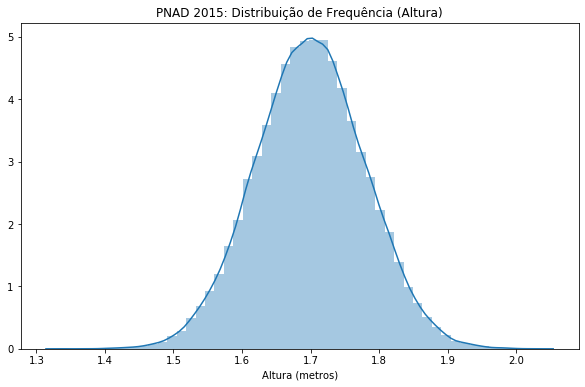

In [11]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df['Altura'])
ax.set(xlabel="Altura (metros)",
       title="PNAD 2015: Distribuição de Frequência (Altura)");

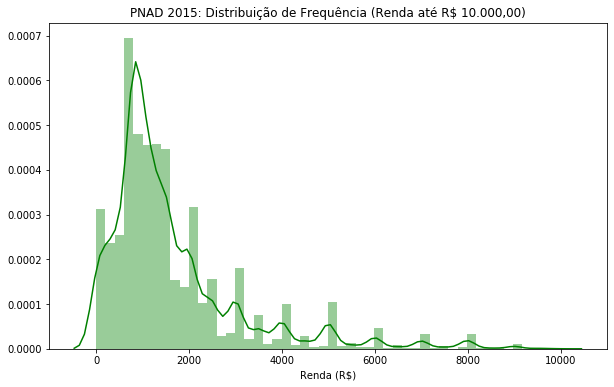

In [12]:
query = df.query('Renda < 10000')

plt.figure(figsize=(10,6))
ax = sns.distplot(query['Renda'], color="green")
ax.set(xlabel="Renda (R$)",
       title="PNAD 2015: Distribuição de Frequência (Renda até R$ 10.000,00)");

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

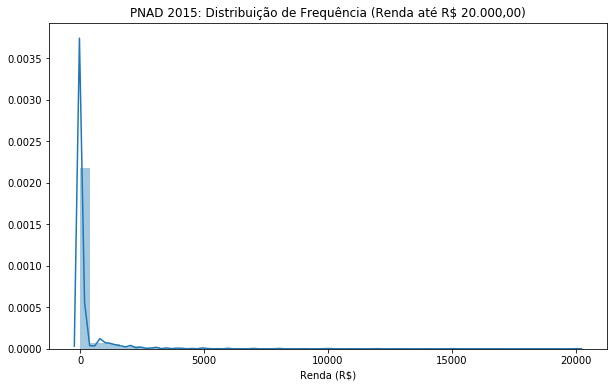

In [13]:
query = df.query('Renda <= 20000')

plt.figure(figsize=(10,6))
ax = sns.distplot(query)
ax.set(xlabel="Renda (R$)", 
       title="PNAD 2015: Distribuição de Frequência (Renda até R$ 20.000,00)");

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [15]:
df_sexo_cor = pd.crosstab(df['Cor'], df['Sexo'])
df_sexo_cor.rename(index=cor, columns=sexo, inplace=True)

df_sexo_cor.head()

Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [32]:
df_sexo_cor_pct = pd.crosstab(df['Cor'], df['Sexo'], normalize=True)*100
df_sexo_cor_pct.rename(index=cor, columns=sexo, inplace=True)

df_sexo_cor_pct.head()

Sexo,Masculino,Feminino
Cor,,
Indígena,0.333160,0.131442
Branca,28.883394,12.520822
Preta,7.160333,3.759761
Amarela,0.305830,0.152264
Parda,32.617126,14.135867


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [17]:
df["Renda"].mean()

2000.3831988547631

### Obtenha a mediana

In [18]:
df["Renda"].median()

1200.0

### Obtenha a moda

In [19]:
df["Renda"].mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [20]:
df["Renda"].mad()

1526.4951371638058

### Obtenha a variância

In [21]:
df["Renda"].var()

11044906.006217021

### Obtenha o desvio-padrão

In [22]:
df["Renda"].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [23]:
df_cor_sexo2 = pd.crosstab(df["Cor"], 
                           df["Sexo"], 
                           values=df["Renda"],
                           aggfunc=('mean', 'median', 'max'))

df_cor_sexo2.rename(index=cor, columns=sexo, inplace=True)
df_cor_sexo2.head()

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [24]:
df_cor_sexo3 = pd.crosstab(df["Cor"], 
                           df["Sexo"], 
                           values=df["Renda"],
                           aggfunc=('mad', 'var', 'std'))

df_cor_sexo3.rename(index=cor, columns=sexo, inplace=True)
df_cor_sexo3.head()

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

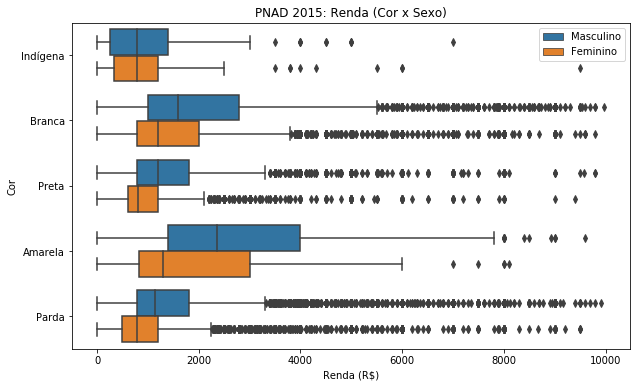

In [25]:
query = df.query("Renda < 10000")

plt.figure(figsize=(10,6))

ax = sns.boxplot(x="Renda", y="Cor", hue="Sexo", orient="h", data=query)
handles, _ = ax.get_legend_handles_labels()

ax.set(xlabel="Renda (R$)", 
       title="PNAD 2015: Renda (Cor x Sexo)")
ax.set_yticklabels(list(cor.values()))
ax.legend(handles, list(sexo.values()));

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [26]:
from scipy import stats

percentual = stats.percentileofscore(df["Renda"], 788, kind="weak")
print("{:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [27]:
valor_maximo = df["Renda"].quantile(.99)
print("R$ {:.2f}".format(valor_maximo))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [28]:
df_estudo_sexo = pd.crosstab(df['Anos de Estudo'], 
                             df['Sexo'], 
                             values=df['Renda'], 
                             aggfunc=("mean", "median", "max", "std"))

df_estudo_sexo.rename(columns=sexo, index=anos_de_estudo, inplace=True)
df_estudo_sexo.head()

max                  mean              \
Sexo                           Masculino Feminino    Masculino    Feminino   
Anos de Estudo                                                               
Sem instrução e menos de 1 ano   30000.0  10000.0   799.494638  516.201748   
1 ano                            30000.0   2000.0   895.629047  492.771987   
2 anos                           40000.0   4000.0   931.178986  529.911638   
3 anos                           80000.0   3500.0  1109.203862  546.853916   
4 anos                           50000.0  10000.0  1302.329283  704.279111   

                                  median                   std              
Sexo                           Masculino Feminino    Masculino    Feminino  
Anos de Estudo                                                              
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884  639.311534  
1 ano                              788.0    400.0  1331.950552  425.291842  
2 anos                             788.0    450.0  1435.173827  498.234168  
3 anos                             800.0    500.0  2143.800133  424.124446  
4 anos                            1000.0    788.0  1419.821787  629.553397

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

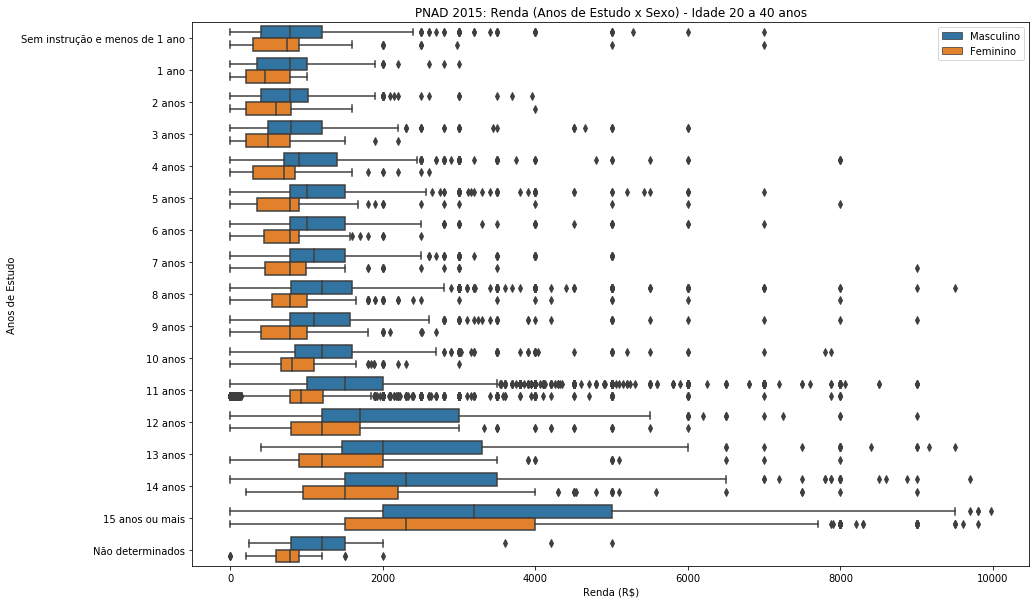

In [29]:
query = df.query("Renda < 10000 and Idade > 19 and Idade < 41")

plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Renda", y="Anos de Estudo", hue="Sexo", data=query, orient="h")

ax.set(xlabel="Renda (R$)", 
       title="PNAD 2015: Renda (Anos de Estudo x Sexo) - Idade 20 a 40 anos")
ax.set_yticklabels(list(anos_de_estudo.values()))
ax.legend(handles, list(sexo.values()));

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [30]:
df_renda_uf = df.groupby('UF').agg({
    "Renda": ['mean', 'median', 'max', 'std']
})

df_renda_uf.rename(index=uf, inplace=True)
df_renda_uf.sort_index(inplace=True)
df_renda_uf.head()

Renda                            
                 mean median     max          std
UF                                               
Acre      1506.091782    900   30000  2276.233415
Alagoas   1144.552602    788   11000  1237.856197
Amapá     1861.353516   1200   15580  2020.688632
Amazonas  1445.130100    900   22000  1757.935591
Bahia     1429.645094    800  200000  3507.917248

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

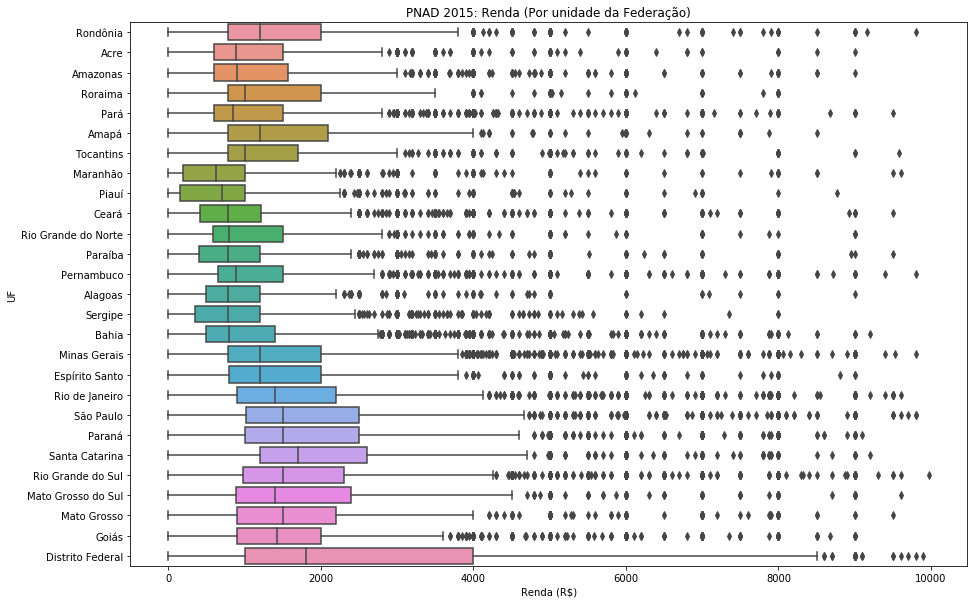

In [31]:
query = df.query("Renda < 10000")

plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Renda", y="UF", data=query, orient="h")
ax.set(xlabel="Renda (R$)", 
       title="PNAD 2015: Renda (Por unidade da Federação)")
ax.set_yticklabels(list(uf.values()));